<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# HYDRAULIQUE SOUTERRAINE

    
    
Les principales équations régissant les écoulements souterrains au sein des formations géologiques sont abordées. L'analyse mathématique utlisée pour résoudre des problèmes hydrogéologiques est présentée pour des cas simples.
Au menu:
1.  <a href='#nappe_captive'>Ecoulement permanent en nappe captive</a>
2.  <a href='#nappe_libre'>Ecoulement permanent en nappe libre</a>

<a id='nappe_captive'></a>
## 1. Ecoulement mono-dimensionnel en régime permanent en nappe captive

On considère un aquifère d'épaisseur constante b = 20 mètres. Le niveau piézométrique chute de 5 mètres entre 2 piézomètres situés à 500 m de distance. La conductivité hydraulique est K = 1e-4 m/s et la porosité efficace est de 0.15.
Le modèle conceptuel est donné ci-après.

<figure>
  <IMG SRC="laplace_captif.png" WIDTH=800 ALIGN="center">
</figure>


In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1e-4 # m/s
b = 20 #metres
T = K * b * 86400 #m2/j
omega = 0.15

h0 = 20 #mNG
hL = 15 #mNG
L = 500 #m


### Question 1.a

Retrouver l'équation de la hauteur piézométrique entre les 2 piézomètres en considérant un écoulement en régime permanent et tracer le profil piézométrique entre les deux piézométres



#### Utilisation de l'équation de diffusivité
    
Pour un écoulement monodimensionnel, l'équation de diffusivité peut s'écrire (Eq.1):

$$
\frac{d^2 h}{dx^2} = \frac{S}{Kb} \frac{dh}{dt}
$$

Pour une nappe captive, si l'aquifère présente une épaisseur constante, le produit $Kb$  qui correspond à la transmissivité est constant et est indépendant de la hauteur piézométrique $h$.

Le régime d'écoulement considéré dans le cas présent est permanent (pas de variation au cours du temps), donc (Eq.2):

$$
\frac{dh}{dt} = 0
$$

et en combinant l'équation (1) et (2), on obtient (Eq.3):

$$
\frac{d^2 h}{dx^2} = 0
$$

L'équation (3) constitue l'équation de Laplace 1D.

Pour le modèle conceptuel considéré, nous retenons les conditions limites suivantes:
- $ h = h_0 $ pour $ x = 0 $ (Eq.4)
- $ h = h_L $ pour $ x = L $ (Eq.5)

L'équation différentielle (3) peut être résolue à l'aide des conditions limites (4) et (5).
En réécrivant l'équation (3) en (Eq.6):

$$
\frac{d^2 h}{dx^2}  = 0 = \frac{d \left( {\frac{dh}{dx}} \right)}{dx}
$$

Par intégration de l'équation (6), on a (Eq.7):

$$
\int_{}^{} \frac{d \left( {\frac{dh}{dx}} \right)}{dx} = 0 \Longrightarrow \frac{dh}{dx} = C
$$

avec C constante d'intégration.

L'intégration de (7) amène (Eq.8)

$$
\int_{}^{} \frac{dh}{dx}{dx} = C \Longrightarrow h(x) = Cx + D
$$

avec D deuxième constante d'intégration.

Pour les conditions limites suivantes:
- $ h = h_0 $ pour $ x = 0 $ donc $h(0) = C\times0 + D $ soit $ D = h_0 $ (Eq.9)
- $ h = h_L $ pour $ x = L $ donc $h(D) = C.L + h_0 $ soit $ D = \frac{h_L - h_0}{L}$ (Eq.10)

Finalement, par combinaison de Eq.8, Eq.9 et Eq.10, l'équation finale 1D de Laplace peut s'écrire pour le système conceptuel envisagé (Eq.11):

$$
h = \frac{h_0 - h_L}{L}x + h_0
$$
    

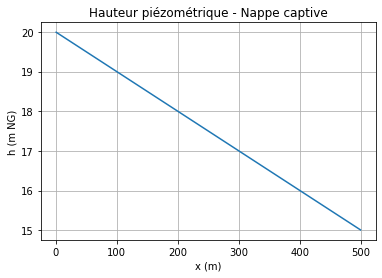

In [2]:
#profil piézométrique

x = np.arange(1,L,1)
h = h0 - ((h0 - hL)/L) * x

plt.title('Hauteur piézométrique - Nappe captive')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')

plt.grid()
plt.plot(x,h)
plt.show()

### Question 1.b

Déterminer le débit transitant au sein de l'aquifère en considérant un front d'emprunt de 10 m de large



Par application de la loi de Darcy, le débit $Q$ transitant à travers l'aquifère par largeur unitaire peut être exprimé par (Eq.1):
    
$$
Q = -Kb\frac{dh}{dx}
$$

l'équation (1) peut être utilisée pour estimer le débit $Q$ transitant au sein de la nappe si on connaît les valeurs $h_0$ et $h_L$ en deux points de la nappe distants de $L$ (Eq.2):
$$
Q = Kb\left({ \frac{h_0 - h_L}{L}} \right)
$$
soit pour un front d'écoulement $W = 10$ mètres:

$$
Q_W = Q W
$$


In [8]:
# debit transitant dans l'aquifere sur 10 m de front d'emprunt
Q = (T * (h0-hL)/L) * 10

print('Le débit transitant au sein de l"aquifère est Q = {:.3g} m3/jour'.format(Q))


Le débit transitant au sein de l"aquifère est Q = 17.3 m3/jour


### Question 1.c

Déterminer la vitesse de circulation du fluide au sein de l'aquifère

La vitesse de circulation réelle $u$ est obtnue à partir de la vitesse de Darcy $q = Q/A$ et de la porosité efficace $\omega$:
$$
u = q \omega
$$

In [10]:
# vitesse de circulation du fluide au sein de l'aquifère

u = (K * (h0-hL)/L) * omega * 86400

print('vitesse de circulation du fluide au sein de l"aquifère u = {:.3g} m/jour'.format(u))


vitesse de circulation du fluide au sein de l"aquifère u = 0.013 m/jour


<a id='nappe_libre'></a>

## 2. Ecoulement mono-dimensionnel en régime permanent en nappe libre


<figure>
  <IMG SRC="laplace_libre.png" WIDTH=800 ALIGN="center">
</figure>

On considère une nappe libre homogène en connexion hydraulique avec 2 plans d'eau distant de $L = {500}$ mètres. Les épaisseurs saturées au niveau  des plans d'eau sont $H_0 = 20$ mètres  et $H_L = 15$ mètres. L'aquifère peut être soumis à une recharge pluviométrique homogène N (mètre d'eau).


### Question 2.a

Retrouver l'équation de la hauteur piézométrique entre les 2 plans d'eau en considérant un écoulement en régime permanent, sans recharge pluviométrique puis en prenant en compte une recharge pluviométrique homogène N sur l'aquifère;

#### Utilisation de l'équation de diffusivité

On souhaite exprimer la distribution spatiale de la hauteur piézométrique au sein d'une nappe libre homogène pour un écoulement en régime permanent. La nappe peut être soumise à une recharge uniforme deouis la surface.
Le modèle conceptuel est donné ci-après.

<figure>
  <IMG SRC="2Drechargeb.png" WIDTH=600 ALIGN="center">
</figure>

Pour un écoulement monodimensionnel en nappe libre en prenant en compte un terme puits/source N (recharge), l'équation de diffusivité peut s'écrire (Eq.1):

$$
\frac{\partial}{\partial x}\left(Kh	\frac{\partial h}{\partial x}\right) + N = S	\frac{\partial h}{\partial t}
$$

En réarragenacant les termes et en passant aux dérivées totales, l'équation (1) peut se réécrire pour procéder à sa résolution:
$$    
\frac{\partial}{\partial x}\left(Kh	\frac{\partial h}{\partial x}\right) + N = 0   
$$
$$    
\frac{d}{d x}\left(h\frac{d h}{d x}\right)  = -\frac{N}{K}
$$

Les primitives successives sont:
$$
h\frac{d h}{d x} = -\frac{N}{K}x + C_1
$$
    
et
    
$$
h^2 = -\frac{N}{K}x^2 + C_1 x + C_2
$$

    
Pour le modèle considéré, nous retenons les conditions limites suivantes:
- $ h = h_0 $ pour $ x = 0 $ 
- $ h = h_L $ pour $ x = L $
    
La résolution de la primitive pour les conditions limites amène à l'équation de la surface piézométrique suivante pour la nappe libre soumise à recharge:
$$
h = \sqrt{h_0^2 + \frac{h_L^2-h_0^2}{L}x - \frac{N}{K}(L-x)x}
$$

### Question 2.b

Tracer le profil piézométrique entre les 2 cours d'eau en considérant une recharge efficace $N = 0.4$ mm d'eau

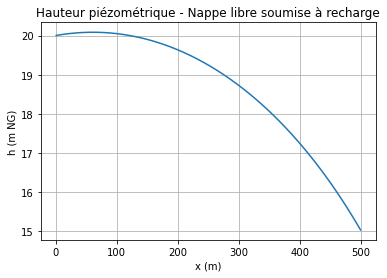

In [45]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1e-4*86400 #m/j
h0 = 20 #mNG
hL = 15 #mNG
N = - 0.008 #m H2O (signe - signifie entree dans le systeme / on peut changer la convention en modifiant le signe de N dans l'equation)
L = 500 #m

# profil piézométrique
x = np.arange(1,500,1)
h = np.sqrt(h0 **2 + ((hL ** 2 - h0 ** 2)/(L)) * x - N/K* (L-x)*x)

plt.title('Hauteur piézométrique - Nappe libre soumise à recharge')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')

plt.grid()
plt.plot(x,h)
plt.show()


### Question 2.b

Dans le cas où la recharge est nulle, quel est le débit transitant au sein de l'aquifère à mi-chemin et juste avant le cours d'eau constituant l'exutoire, pour un front d'écoulement unitaire $W=1$?

- Débit transitant au sein de l'aquifère à mi-chemin ($x=x_{mid}$)

Equation de Darcy:
$$
q = -K\frac{dh}{dx}hW = -Kh\frac{dh}{dx}
$$

Après ré-arrangement pour intégration:
$$
qdx = -Khdh
$$

Et pour les bornes
- $ h = h_0 $ pour $ x = 0 $ 
- $ h = h_{mid} $ pour $ x = x_{mid} $

$$
\int_{0}^{x_{mid}} {q}\mathrm{d}x = \int_{h_0}^{h_{x_{mid}}} {-Kh}\mathrm{d}h
$$

$$
ql_m  = -K \left({\frac{h^2_{x_{mid}} - h^2_0}{2}} \right)
$$

$$
q  = - \frac{K}{2x_{mid}} \left({h^2_{x_{mid}} - h^2_0} \right)
$$

- Débit transitant au sein de l'aquifère à l'exutoire ($x=D$): la démonstration est identique pour des bornes différentes. Au final:

$$
q  = - \frac{K}{2L} \left({h^2_{D} - h^2_0} \right)
$$



In [46]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 1e-4*86400 #m/j
h0 = 20 #mNG
hL = 15 #mNG
N =  -0 #m H2O
L = 500 #m

#calcul de hmid=h(L/2)
xmid = L/2
hmid = np.sqrt(h0 **2 + ((hL ** 2 - h0 ** 2)/(L)) * xmid - N/K* (L-xmid)*xmid)

qmid = -(K/(2*xmid))*(hmid ** 2 - h0 ** 2) 
qex = -(K/(2*L))*(hL ** 2 - h0 ** 2)

print('Le débit transitant au sein de l'' aquifère à mi-chemin est Q = {:.3g} m3/jour'.format(qmid))
print('Le débit transitant au sein de l'' aquifère à l''exutoire est Q = {:.3g} m3/jour'.format(qex))



Le débit transitant au sein de l aquifère à mi-chemin est Q = 1.51 m3/jour
Le débit transitant au sein de l aquifère à lexutoire est Q = 1.51 m3/jour
